# Introduction to regression with Neural Networks in TensorFlow

Predicting a numerical variable based on some other combination of variables, even chorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view and fit

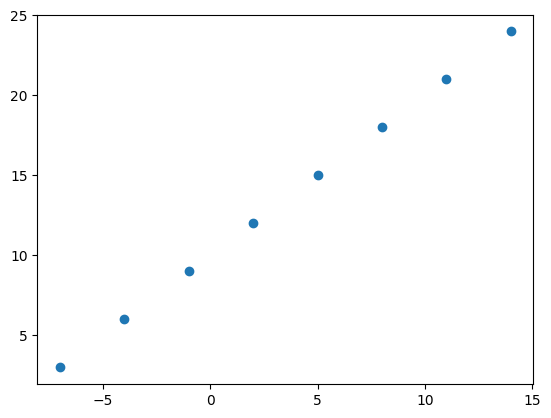

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

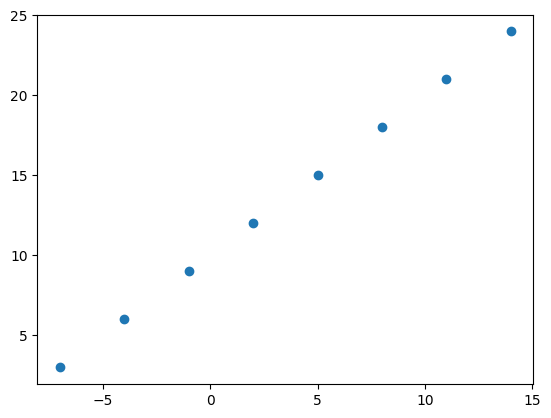

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,             # mae -> mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])    # sgd -> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 725ms/step - loss: 18.0766 - mae: 18.0766
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 17.7954 - mae: 17.7954
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 17.5141 - mae: 17.5141
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 17.2329 - mae: 17.2329
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 16.9516 - mae: 16.9516


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 211ms/step


array([[-12.748179]], dtype=float32)

In [16]:
y_pred + 11

array([[-1.7481794]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it trainning for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, -1), y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 540ms/step - loss: 7.8379 - mae: 7.8379
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 7.7054 - mae: 7.7054
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 7.5729 - mae: 7.5729
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 7.4437 - mae: 7.4437
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 226ms/step


array([[30.224163]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9166 - mae: 12.9166
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2646 - mae: 12.2646
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6114 - mae: 11.6114
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9557 - mae: 10.9557
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2949 - mae: 10.2949
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.6261 - mae: 9.6261
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9463 - mae: 8.9463
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2523 - mae: 8.2523
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5407 - mae: 7.5407
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8585 - mae: 6.8585
Epoch 11/100
1/1 [==============================] - 0s 9ms/step

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 152ms/step


array([[25.917984]], dtype=float32)

## Evaluating a model

In practice, a typical worflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluations ... there are 3 words you should memorize:

> 'Visualize, Visualize, Visualize

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

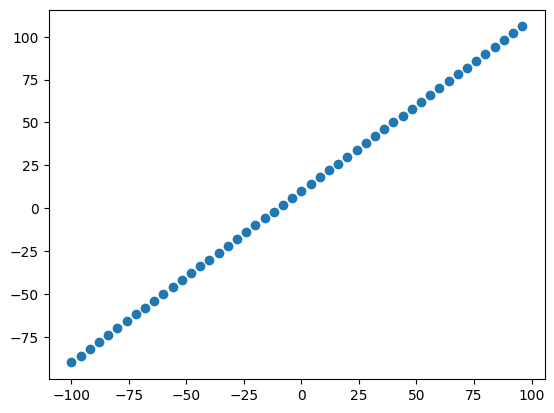

In [25]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...
* **Train set** - the model learns from this data, which is tipically 70 - 80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tipically 10 - 15%.
* **Test set** - the model gets evaluated on this data to test what iy has learned, this set is tipically 10 - 15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
 
 ow we've got our data in training and test sets... let's visualize it again!

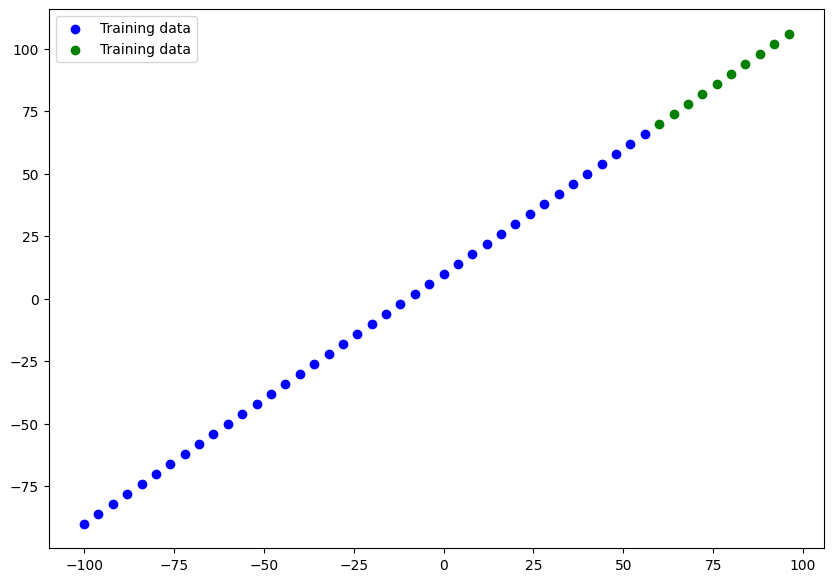

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Training data')
# Show a legend
plt.legend()

In [32]:
# Let's have look at how to build a neural network for our data

# 1.  Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [34]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [37]:
X[0].shape, y[0]

(TensorShape([]), <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [65]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [66]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params . these parameters aren't updated during training (this is typical when you bring in already learn patterns or patameters from other models during **transfer learning**)

In [67]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)